### 확률적 경사하강법

- 경사하강법 : 모델의 가중치를 변경하면서 손실함수가 최소인 지점을 찾는 것임 
=> 미분 계수가 최소값인 부분을 찾자 

In [4]:
import pandas as pd
df = pd.read_csv('data/fish.csv')
df.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [9]:
#X, y 나누기
X = fish[['Weight', 'Length2', 'Length3','Height', 'Width']]
y = fish[['Species']]
print(X[:5], y[:5])

   Weight  Length2  Length3   Height   Width
0   242.0     25.4     30.0  11.5200  4.0200
1   290.0     26.3     31.2  12.4800  4.3056
2   340.0     26.5     31.1  12.3778  4.6961
3   363.0     29.0     33.5  12.7300  4.4555
4   430.0     29.0     34.0  12.4440  5.1340   Species
0   Bream
1   Bream
2   Bream
3   Bream
4   Bream


In [15]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [17]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [21]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, y_train)
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.773109243697479
0.775


C:\Users\82104\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82104\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82104\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [26]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
sc.fit(train_scaled, y_train)

C:\Users\82104\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log', random_state=42)

In [27]:
sc.score(train_scaled, y_train)

0.8571428571428571

In [29]:
sc.partial_fit(train_scaled, y_train) #이어서 학습을 진행한다는 의미임 
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.8991596638655462
0.925


C:\Users\82104\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82104\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
import numpy as np

In [33]:
sc = SGDClassifier(loss='log_loss', random_state = 42)
train_score = []
test_score = []
classes = np.unique(y_train)

In [35]:
for _ in range(0, 300):
  sc.partial_fit(train_scaled, y_train , classes=classes)
  train_score.append(sc.score(train_scaled, y_train))
  test_score.append(sc.score(test_scaled, y_test))

C:\Users\82104\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82104\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82104\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82104\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed w

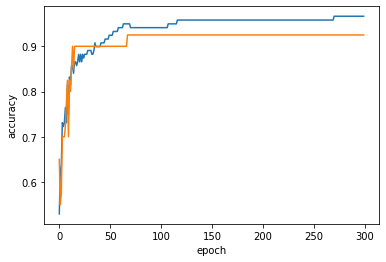

In [36]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

- 끝으로 갈 수록 test 세트 점수에 비해 train 세트 점수가 커지고 있음 
=> epoch 가 100 정도 될 때 적당하다고 볼 수 있음